This plots ROI values extracted from images that have been normalized using DARTEL, 
but the values have been extracted from ROI derived from a prior analysis done using images normalized using DARTEL.

In [1]:
%run /home/grg/git/alfa/nilearn-helper.py
%matplotlib inline

/home/grg/jupyter/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
spmdir = '/home/grg/spm/'
subjects = json.load(open(osp.join(spmdir, 'data', 'subjects.json')))

subjects = [string.atoi(osp.split(e)[-1].split('_')[0]) for e in glob('/home/grg/spm/ROIapoE/ROI_DARTEL/roivalues_csf.5/*.csv')]


In [3]:
def getdict(data, key, column, column2=None, value=None):
    import string
    if not value is None:
        data = data[data[column2] == value]
        
    d1 = dict([(string.atoi(str(int(e))), v) for e, v in data[[key, column]].to_dict(orient='split')['data']])
    return d1

fsvol_fp = osp.join(spmdir, 'data', 'aseg FS ALFA.xlsx')
vvol = pd.read_excel(fsvol_fp)    
d = getdict(vvol, 'subject', 'Volume_mm3', 'StructName', 'Right-Lateral-Ventricle')

In [4]:
# From AAL V4, load labels - names translation table
labels_fp = '/home/grg/data/templates/MNI_atlas_templates/aal_MNI_V4.txt'
df = pd.read_csv(labels_fp, sep='\t', skiprows=0)
labels = {}
for i in range(1,117):
    labels[i] = json.loads(df.to_json()).items()[0][1][str(i)]

roiname = 'Hippocampus_L'
roilabel = [k for k,v in labels.items() if v == roiname][0]
print roiname, roilabel

def collect_data(verbose=False):
    
    # Loading json data etc..
    spmdir = '/home/grg/spm/'

    # Reading main tables with metadata
    demo_fp = osp.join(spmdir, 'data', 'Data_VBM_Alfa.csv')
    subj_fp= osp.join(spmdir, 'data', 'subjects.json')
    gend_fp= osp.join(spmdir, 'data', 'genders.json')
    grp_fp= osp.join(spmdir, 'data', 'apoe_groups.json')
    educ_fp = osp.join(spmdir, 'data', 'educyears.json')
    tiv_fp = osp.join(spmdir, 'data', 'tiv.json')
    fsvol_fp = osp.join(spmdir, 'data', 'aseg FS ALFA.xlsx')
    ages_fp = osp.join(spmdir, 'data', 'age.json') # contains ages in days

    demo = pd.read_csv(demo_fp)
    subjects = json.load(open(subj_fp))
    subjects = [string.atoi(osp.split(e)[-1].split('_')[0]) for e in glob('/home/grg/spm/ROIapoE/ROI_DARTEL/roivalues_csf.5/*.csv')]
    print len(subjects)

    # Sorting out groups
    groups = json.load(open(grp_fp))
    ages = json.load(open(ages_fp))
    genders = json.load(open(gend_fp))
    educyears = json.load(open(educ_fp))
    tivs = json.load(open(tiv_fp))
    vvol = pd.read_excel(fsvol_fp)    
    
    # FreeSurfer Volumes
    vvol_l = getdict(vvol, 'subject', 'Volume_mm3', 'StructName', 'Left-Lateral-Ventricle')
    vvol_r = getdict(vvol, 'subject', 'Volume_mm3', 'StructName', 'Right-Lateral-Ventricle')
    vvol_li = getdict(vvol, 'subject', 'Volume_mm3', 'StructName','Left-Inf-Lat-Vent')
    vvol_ri = getdict(vvol, 'subject', 'Volume_mm3', 'StructName','Right-Inf-Lat-Vent')
    vvol_3 = getdict(vvol, 'subject', 'Volume_mm3', 'StructName','3rd-Ventricle')
    vvol_4 = getdict(vvol, 'subject', 'Volume_mm3', 'StructName', '4th-Ventricle')    
    
    # Building dataframe
    data = []
    subj = []
    for s in subjects:    
        if verbose: print s
        print groups
        group_nb = groups[str(s)]
        row = []
        try:
            fsvol_l = (vvol_l[s] + vvol_li[s]) / tivs[str(s)]
            fsvol_r = (vvol_r[s] + vvol_ri[s]) / tivs[str(s)]
            fsvol = fsvol_l + fsvol_r
            age = ages[str(s)]
            row.append(group_nb)
            row.extend([age/365.25, genders[str(s)], educyears[str(s)], fsvol])            
            subj.append(s)
            data.append(row)
        except KeyError as e:
            print e
        except IndexError as e:
            print e
            print 'removed', s
            
    columns=['apo', 'age', 'gender', 'educyears', 'ventricles']
    return pd.DataFrame(data, index=subj, columns=columns)

data = collect_data()
#data.to_excel('/tmp/covariates.xls')

Hippocampus_L 37
505
{u'77047': 4, u'77044': 3, u'11829': 4, u'10298': 4, u'77040': 3, u'10453': 3, u'10518': 1, u'10450': 3, u'10108': 0, u'10106': 3, u'10515': 4, u'11383': 3, u'55297': 2, u'11387': 0, u'11262': 0, u'13083': 4, u'11264': 2, u'11858': 0, u'13242': 2, u'13169': 2, u'13244': 4, u'11850': 3, u'12930': 1, u'11184': 2, u'55539': 1, u'55538': 0, u'44491': 3, u'12704': 1, u'10200': 2, u'12067': 0, u'11540': 4, u'10199': 2, u'44043': 3, u'10809': 0, u'44046': 0, u'11054': 3, u'13019': 3, u'11137': 2, u'11136': 2, u'11133': 0, u'11139': 2, u'66312': 0, u'12015': 1, u'11687': 4, u'11686': 2, u'66257': 4, u'11768': 0, u'10102': 0, u'10333': 3, u'10330': 2, u'10334': 4, u'66131': 3, u'10701': 4, u'77224': 1, u'12841': 0, u'11007': 3, u'12245': 1, u'11614': 0, u'11610': 0, u'12121': 0, u'10634': 3, u'12125': 4, u'10630': 0, u'10417': 2, u'10416': 3, u'10144': 4, u'66042': 2, u'66048': 2, u'10419': 0, u'10418': 3, u'10035': 3, u'10385': 2, u'10028': 2, u'10029': 3, u'10794': 3, u'1

In [5]:
def collect_roivalues(roilabel, verbose=False):
    ''' This collect the values from *_AAL_MD_stats.csv files, that is 
    MD mean values in every subject's NATIVE space.
    '''
    
    subjects  = json.load(open('/home/grg/spm/data/subjects.json'))
    subjects = [string.atoi(osp.split(e)[-1].split('_')[0]) for e in glob('/home/grg/spm/ROIapoE/ROI_DARTEL/roivalues_csf0/*.csv')]

    data_wd = '/home/grg/data/ALFA_DWI'
    
    data = []
    subj = []
    
    for s in subjects:    
        fp = '/home/grg/spm/ROIapoE/ROI_DARTEL/roivalues_csf0/%s_stats.csv'%s
        if verbose:
            print s, fp
        df = pd.read_csv(fp, sep='\t').set_index('ROI_label')   
        try:
            data.append(df.ix[roilabel]['mean'])            
            subj.append(s)            
        except KeyError as e:
            print 'KeyError: skipped subject', s, 'label', e
        except IndexError as e:
            print 'IndexError: skipped subject', s, 'label', e
    return pd.DataFrame(data, index=subj, columns=['roi'])

In [9]:
def correct(df):
    model = 'roi ~ 1 + C(apo) + gender + educyears'
    test_scores = ols(model, data=df).fit()
    
    err = test_scores.predict(df) - df['roi']
    ycorr = np.mean(df['roi']) - err   
    
    return ycorr

# Loading, joining, dropping etc.
data = pd.read_excel('/tmp/covariates.xls')
data = data.drop(data[data['ventricles']>30].index)
data['subject'] = data.index
data = data.sort_values(['apo', 'subject'])
#roilabel = 1
#roivalues = collect_roivalues(roilabel)
#df = data.join(roivalues)
#df['subject'] = df.index
#df = df.sort_values(['apo', 'subject']).dropna()
#df = df.drop(df[df['ventricles']>30].index)

# Correcting data for covariates
#ycorr = correct(df)
#df = data.join(ycorr)
#df['subject'] = df.index
#df = df.sort_values(['apo', 'subject']).dropna()
#df = df.drop(df[df['ventricles']>30].index)


data.head()

IOError: [Errno 2] No such file or directory: '/tmp/covariates.xls'

In [10]:
y_name = 'roi'
x_name = ['apo', 'age', 'gender', 'educyears', 'ventricles']
#test_scores = sm.OLS(np.asarray(df[y_name]), np.asarray(df[x_name])).fit()
model = 'roi ~ 1 + C(apo) + age + gender + educyears + ventricles'
test_scores = ols(model, data=df).fit()

NameError: name 'df' is not defined

In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

def set_figaxes(df):
    plt.xlabel('age')
    plt.ylabel('roi')
    #plt.ylim([0.0005, df['roi'].max()])
    plt.ylim([0.0005, 0.0010]) #df['roi'].max()])
    plt.xlim([df['age'].min(), df['age'].max()])
    
    
def get_groups(dataset, groups_names=[]):
    # take each group separately
    if len(groups_names) == 0:
        groups_names = ['apoe23', 'apoe24', 'apoe33', 'apoe34', 'apoe44']
    groups1 = []
    for i in xrange(5):
        groups1.append(dataset[dataset['apo'] == i])
    groups = []
    for name in groups_names:
        if name == 'C':
            groups.append(pd.concat([groups1[i] for i in [1,3,4]]))
        elif name == 'NC':
            groups.append(pd.concat([groups1[i] for i in [0,2]]))
        elif name == 'HO':
            groups.append(pd.concat([groups1[i] for i in [4]]))
        elif name == 'HT':
            groups.append(pd.concat([groups1[i] for i in [1,3]]))
    if len(groups) == 0:
        return groups1, groups_names
    return groups, groups_names

def plot_region(roiname, dataset, order=1, ax=None):
    if ax == None:
        fig = plt.figure(figsize=(6, 6))
        set_figaxes(dataset)
        ax = fig.add_subplot(111)

    colors = ['#003366','#800000','g','m','y']
    facecolors = ['#99ccff','#ff9999','g','m','y']

    formulas = ['roi ~ 1 + age'] 
                #'roi ~ 1 + age + I(age**2)', 
                #'roi ~ 1 + age + I(age**2) + I(age**3)']
    print 'Region:', roiname, '- Fitting order:', order, '- Formula:', formulas[order-1]
    
    groups_names = ['NC', 'HO']
    groups, groups_names = get_groups(dataset, groups_names = groups_names)
        
    for i, df in enumerate(groups):
        ax.scatter(df['age'], df['roi'], edgecolors=colors[i], facecolors=facecolors[i], linewidth=0.5,
                   label='%s'%groups_names[i].capitalize(), s=20, alpha=0.7)
        x = pd.DataFrame({'age': np.linspace(df['age'].min(), df['age'].max(), 100)})
        
        poly = ols(formula=formulas[order-1], data=df).fit()
        ypred = poly.predict(x)
        #print np.std(ypred)
        ax.plot(x['age'], ypred, color=colors[i], linestyle='-', 
                label='%s n=%s $R^2$=%.2f $AIC$=%.2f $sigma$=%.3e' % (groups_names[i].capitalize(), order, poly.rsquared, poly.aic, np.std(ypred)), 
                alpha=1.0)

    ax.legend(prop={'size':8})
    ax.text(0.15, 0.95, roiname, horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)
    plt.title(roiname)
    import tempfile
    tmpfile = tempfile.mkstemp(suffix='.svg')
    print tmpfile[1]
    plt.savefig(tmpfile[1], format='svg')


In [11]:
def plot_regions(data, regions, nb_orders=3):
    nb_regions = len(regions)
    fig = plt.figure(figsize=(8*nb_orders, 8*nb_regions), dpi=300, facecolor='white')
    
    for i, roilabel in enumerate(regions):
        labels = ['left_occip', 'left_temporal', 'right_perihorn', 'left_occip', 'left_perihorn', 'left_wm', 'right_occip', 'right_temporal', 'left_insula']
        roiname = '%s'%labels[roilabel-1]
        # 1-st order
        ax = fig.add_subplot(nb_regions, nb_orders, nb_orders*i + 1)
        roivalues = collect_roivalues(roilabel)
        df = data.join(roivalues)
        print np.std(df['roi'])
        ycorr = pd.DataFrame(correct(df), columns=['roi'])
        df = data.join(ycorr)
        df['subject'] = df.index
        df = df.sort_values(['apo', 'subject']).dropna()
    
        set_figaxes(df)
        print np.std(df['roi'])
        plot_region(roiname, df, order=1, ax=ax)

        # 2-nd order
#        ax = fig.add_subplot(nb_regions, nb_orders, nb_orders*i + 2)
#        roivalues = collect_roivalues(roilabel)
#        df = data.join(roivalues)
#        ycorr = pd.DataFrame(correct(df), columns=['roi'])
#        df = data.join(ycorr)
#        df['subject'] = df.index
#        df = df.sort_values(['apo', 'subject']).dropna()
#    
#        set_figaxes(df)
#        plot_region(roiname, df, order=2, ax=ax)

        # 3-rd order
#        ax = fig.add_subplot(nb_regions, nb_orders, nb_orders*i + 3)
#        roivalues = collect_roivalues(roilabel)
#        df = data.join(roivalues)
#        ycorr = pd.DataFrame(correct(df), columns=['roi'])
#        df = data.join(ycorr)
#        df['subject'] = df.index
#        df = df.sort_values(['apo', 'subject']).dropna()
    
#        set_figaxes(df)
#        plot_region(roiname, df, order=3, ax=ax)
 

This collect the values from \*\_stats.csv files, i.e. values that have been extracted from ROI manually drawn in MNI space.
The bad thing with this is that the ROI is defined in a reference space. This is subject to individual registration errors.

7.23065519381e-05
7.09479470623e-05
Region: left_occip - Fitting order: 1 - Formula: roi ~ 1 + age
/tmp/tmpaWSC5c.svg
7.80915181739e-05
7.65862842956e-05
Region: left_temporal - Fitting order: 1 - Formula: roi ~ 1 + age
/tmp/tmpwDxnyB.svg
7.60303042271e-05
7.46901871876e-05
Region: left_occip - Fitting order: 1 - Formula: roi ~ 1 + age
/tmp/tmpyzU5mu.svg
7.55182111543e-05
7.44538584509e-05
Region: right_temporal - Fitting order: 1 - Formula: roi ~ 1 + age
/tmp/tmpm8iMz1.svg


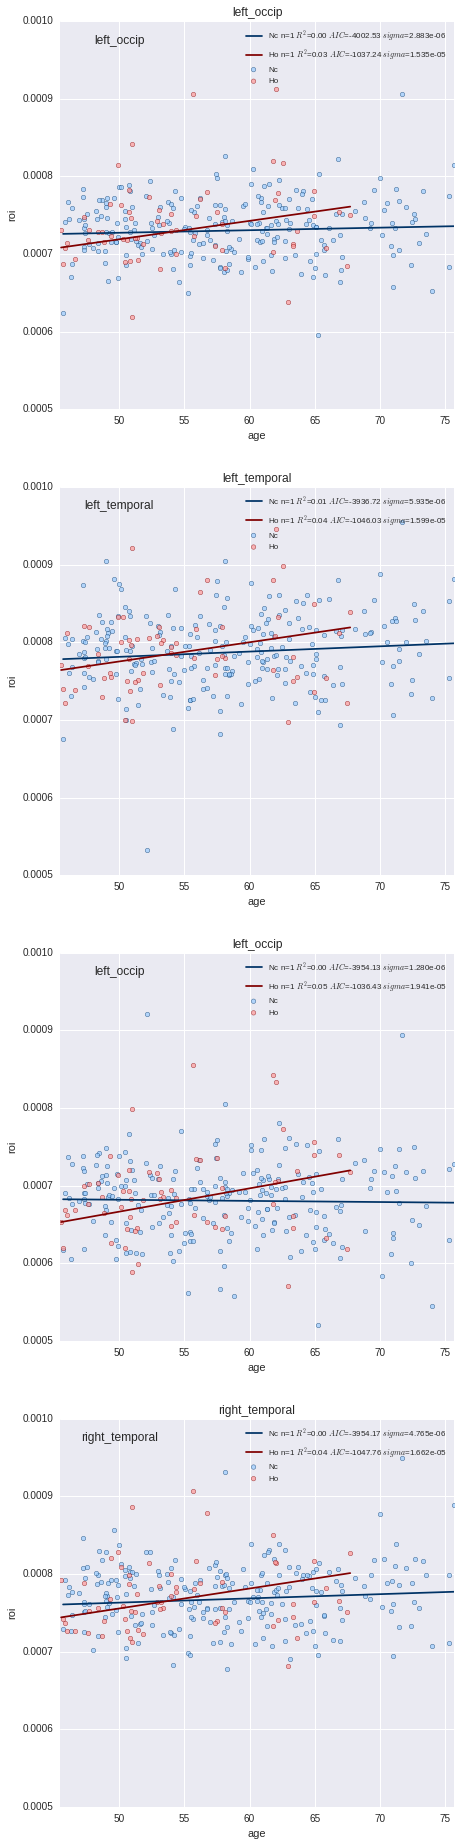

In [12]:
import seaborn  
%config InlineBackend.figure_format = 'png'

regions = [1,2,4,8]
plot_regions(data, regions)

#plot_regions(data, [71,72])

In [70]:
plt.savefig('/tmp/test.svg', format='svg')

In [54]:
import plotly
#plotly.init_notebook_mode()

def plotly_region(roilabel):
    to_remove = [55166, 66159, 77068, 10182, 13059, 66019, 66264, 77024, 77263,
            10846, 66026, 66039, 66131, 66368, 77027, 77047]
    data = collect_data()
    roivalues = collect_roivalues(roilabel)
    #data = data[data['apo']==0]
    df = data.join(roivalues)
    df['subject'] = df.index
    df = df.drop(to_remove)
    
    
    import plotly.plotly as py
    import plotly.graph_objs as go

    #data = [trace]

    # Plot and embed in ipython notebook!
    #

    trace = go.Scatter3d(
        x = df['age'],
        y = df['roi'],
        z = df['ventricles'],
        marker=dict(
            size='4',
            color = df['apo'], #set color equal to a variable
            colorscale='Jet',
            showscale=True),
        text = df['subject'],
        mode = 'markers'
    )

    data = [trace]

    # Plot and embed in ipython notebook!
    py.iplot(data)
    # or plot with: plot_url = py.plot(data, filename='basic-line')

In [55]:
df2[df2['ventricles']>30].drop([55166])

NameError: name 'df2' is not defined

In [115]:
data = collect_data()
roivalues = collect_roivalues(roilabel)
#data = data[data['apo']==0]
df = data.join(roivalues)
df['subject'] = df.index


import plotly.plotly as py
import plotly.graph_objs as go

#data = [trace]

# Plot and embed in ipython notebook!
#

trace = go.Scatter(
    x = df['age'],
    y = df['ventricles'],
    
    marker=dict(
        size='4',
        color = df['gender'], #set color equal to a variable
        colorscale='Jet',
        showscale=True),
    text = df['subject'],
    mode = 'markers'
)

data = [trace]

# Plot and embed in ipython notebook!
py.iplot(data)

514
KeyError: skipped subject 10070 label 37
KeyError: skipped subject 10102 label 37
KeyError: skipped subject 10108 label 37
KeyError: skipped subject 10235 label 37
KeyError: skipped subject 10365 label 37
KeyError: skipped subject 10419 label 37
KeyError: skipped subject 10463 label 37
KeyError: skipped subject 10530 label 37
KeyError: skipped subject 10551 label 37
KeyError: skipped subject 10563 label 37
KeyError: skipped subject 10576 label 37
KeyError: skipped subject 10630 label 37
KeyError: skipped subject 10668 label 37
KeyError: skipped subject 10692 label 37
KeyError: skipped subject 10693 label 37
KeyError: skipped subject 10703 label 37
KeyError: skipped subject 10725 label 37
KeyError: skipped subject 10737 label 37
KeyError: skipped subject 10756 label 37
KeyError: skipped subject 10809 label 37
KeyError: skipped subject 11045 label 37
KeyError: skipped subject 11047 label 37
KeyError: skipped subject 11048 label 37
KeyError: skipped subject 11133 label 37
KeyError: sk

In [148]:
sorted(to_remove)

[10182,
 10846,
 13059,
 55166,
 66019,
 66026,
 66039,
 66131,
 66159,
 66264,
 66368,
 77024,
 77027,
 77047,
 77068,
 77263]

In [33]:
df = collect_roivalues(1)
#data = collect_data()
#df2 = data.join(df).drop(data[data['ventricles']>30].index)
df.head()


    

NameError: global name 'string' is not defined

In [175]:
ypred = correct(df2)

In [176]:
type(ypred)

pandas.core.series.Series

In [269]:
order = 1
for i in range(1, 9):
    roivalues = collect_roivalues(i)
    df = data.join(roivalues)
    ycorr = pd.DataFrame(correct(df), columns=['roi'])
    df = data.join(ycorr)
    df['subject'] = df.index
    df = df.sort_values(['apo', 'subject']).dropna()
    formulas = ['roi ~ 1 + age'] #, 
    #        'roi ~ 1 + age + I(age**2)', 
    #        'roi ~ 1 + age + I(age**2) + I(age**3)']

    poly = ols(formula=formulas[0], data=df).fit()
    print poly.summary()
    
    break

                            OLS Regression Results                            
Dep. Variable:                    roi   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     5.929
Date:                Wed, 01 Feb 2017   Prob (F-statistic):             0.0152
Time:                        18:22:24   Log-Likelihood:                 4294.9
No. Observations:                 498   AIC:                            -8586.
Df Residuals:                     496   BIC:                            -8577.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0008   1.56e-05     49.838      0.0

In [234]:
poly.pvalues

Intercept      2.917992e-152
C(apo)[T.1]     9.495188e-01
C(apo)[T.2]     6.668016e-01
C(apo)[T.3]     7.440946e-01
C(apo)[T.4]     8.886761e-01
age             5.645333e-03
gender          9.564123e-01
educyears       6.172272e-01
ventricles      2.713613e-01
dtype: float64

Intercept    0.000721
age          0.000002
dtype: float64